In [2]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
import numpy as np



import numpy as np
import random
import math
import os
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision


from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [3]:
import os
import random
# from numpy.random import seed
# seed(1)
import tensorflow as tf
# tensorflow.random.set_seed(2)
def seed_tensorflow(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1' # `pip install tensorflow-determinism` first,使用与tf>2.1
    # os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    #session_conf = tf.compat.v1.ConfigProto(  # 应该是适合于 1.x 版本的
    #    intra_op_parallelism_threads=1,
    #    inter_op_parallelism_threads=1
    #)
    #sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    #tf.compat.v1.keras.backend.set_session(sess)
seed_tensorflow(42)
# tf.config.enable_deterministic_ops(enabled) # 官方还在做...
# tf.config.deterministic_ops_enabled()

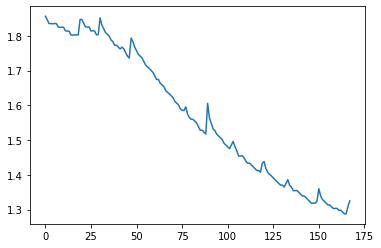

In [16]:
predict = pd.read_csv('./result/NASA/B0005_prediction.csv')
# predict = pd.read_csv('./result/CALCE/CS2_35_prediction.csv')

Capacity = predict['Capacity']

data = Capacity
# data = pd.read_csv('./CS2_38_Capacity.csv',index_col=0)
data = np.squeeze(data)

plt.plot(data)

In [17]:
def create_dataset(text, window_size):
    #text:list of capacity
    y ,x= [],[]
    for i in range(len(text) - window_size):
        target = text.iloc[i+window_size]
        yangben = text.iloc[i:i+window_size]

        y.append(target)
        x.append(yangben)

    return  np.array(y),np.array(x)


In [18]:
look_back = 6
train_size=int(len(data)*0.5)
test_size = len(data)-train_size

print("测试集长度：",test_size)
train, test = data.iloc[0:train_size], data.iloc[train_size-look_back:]


train_y ,train_x= create_dataset(train, look_back)
train_y = train_y.reshape(-1,1)

test_y,test_x = create_dataset(test, look_back)
test_y = test_y.reshape(-1,1)

print("训练集维度：",train_x.shape)
print("测试集维度：",test_x.shape)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))

test_x = np.reshape(test_x, (test_x.shape[0], train_x.shape[1],1))
print("训练集维度：",train_x.shape)
print("测试集维度：",test_x.shape)

测试集长度： 84
训练集维度： (78, 6)
测试集维度： (84, 6)
训练集维度： (78, 6, 1)
测试集维度： (84, 6, 1)


In [19]:

Pre_LSTnet_AS = predict['LSTnet_AS']


testPredict = Pre_LSTnet_AS.iloc[train_size:]

testPredict = np.array(testPredict)

testPredict = testPredict.reshape(-1,1)

print(testPredict.shape)
print(test_y.shape)

(84, 1)
(84, 1)


In [20]:
# 评价指标
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error


LSTNet_Att_IMF1_RMSE = np.sqrt(mean_squared_error(test_y, testPredict[:,0]))
print('Test Score: %.4f RMSE' % (LSTNet_Att_IMF1_RMSE * 100))

LSTNet_Att_IMF1_MAE = mean_absolute_error(test_y, testPredict[:,0])
print('Test Score: %.4f MAE' % (LSTNet_Att_IMF1_MAE * 100))

LSTNet_Att_IMF1_MSE = mean_squared_error(test_y, testPredict[:,0])
print('Test Score: %.4f MSE' % (LSTNet_Att_IMF1_MSE))

LSTNet_Att_IMF1_R2 = r2_score(test_y, testPredict[:,0])
print('Test Score: %.4f R2' % (LSTNet_Att_IMF1_R2 * 100))


Test Score: 0.8229 RMSE
Test Score: 0.7127 MAE
Test Score: 0.0001 MSE
Test Score: 98.9497 R2


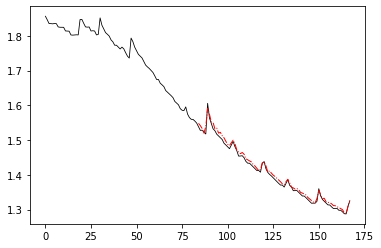

In [21]:
plt.plot(Capacity,color='k',linewidth=0.8)
plt.plot(Pre_LSTnet_AS,color='r',linestyle='-.',linewidth=1)